In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score,recall_score

# Create Data Frame using pandas using read_csv 
train_data = pd.read_csv("Beans-Train.csv")
test_data = pd.read_csv("Beans-Test.csv")

In [ ]:
#Get top 5 rows from train_data
train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,54180,951.753,388.728347,178.948203,2.172295,0.887741,55014,262.648279,0.580210,0.984840,0.751624,0.675660,0.007175,0.000922,0.456517,0.991689,HOROZ
1,42023,746.715,272.962686,196.334047,1.390297,0.694730,42365,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,DERMASON
2,38600,716.517,254.129288,193.991641,1.310001,0.645976,38940,221.691331,0.715265,0.991269,0.944809,0.872356,0.006584,0.002352,0.761006,0.996919,SEKER
3,62298,992.583,327.685094,242.658033,1.350399,0.672032,63353,281.638558,0.801157,0.983347,0.794603,0.859479,0.005260,0.001771,0.738705,0.997546,BARBUNYA
4,74456,1085.466,447.665972,212.382328,2.107831,0.880298,75096,307.896612,0.788821,0.991478,0.794104,0.687782,0.006012,0.000830,0.473044,0.997097,HOROZ


In [ ]:
#Get top 5 rows from test_data
test_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
1,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
2,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
3,31107,640.594,214.648549,184.969253,1.160455,0.507366,31423,199.014227,0.761046,0.989944,0.952582,0.927163,0.006900,0.003145,0.859632,0.997564,SEKER
4,31203,639.782,215.067737,184.874876,1.163315,0.510947,31558,199.321081,0.762984,0.988751,0.957949,0.926783,0.006893,0.003137,0.858926,0.999202,SEKER


In [ ]:
# Get the shape of train_data
train_data.shape


(9528, 17)

In [ ]:
# Get the shape of train_data
test_data.shape

(4083, 17)

In [ ]:
#Rename columns of train and test data match to python variable name specifications

train_data.rename(columns = {"Area": "area", "Perimeter": "perimeter", "MajorAxisLength": "major_axis_length", "MinorAxisLength": "minor_axis_length", "AspectRation": "aspect_ratio", "Eccentricity": "eccentricity", "ConvexArea": "convex_area", "EquivDiameter": "equiv_diameter", "Extent": "extent", "Solidity": "solidity", "roundness": "roundness", "Compactness": "compactness", "ShapeFactor1": "shape_factor_1", "ShapeFactor2": "shape_factor_2", "ShapeFactor3": "shape_factor_3", "ShapeFactor4": "shape_factor_4", "Class": "class"}, inplace = True)

test_data.rename(columns = {"Area": "area", "Perimeter": "perimeter", "MajorAxisLength": "major_axis_length", "MinorAxisLength": "minor_axis_length", "AspectRation": "aspect_ratio", "Eccentricity": "eccentricity", "ConvexArea": "convex_area", "EquivDiameter": "equiv_diameter", "Extent": "extent", "Solidity": "solidity", "roundness": "roundness", "Compactness": "compactness", "ShapeFactor1": "shape_factor_1", "ShapeFactor2": "shape_factor_2", "ShapeFactor3": "shape_factor_3", "ShapeFactor4": "shape_factor_4", "Class": "class"}, inplace = True)


In [ ]:
# Get the summary about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               9528 non-null   int64  
 1   perimeter          9528 non-null   float64
 2   major_axis_length  9528 non-null   float64
 3   minor_axis_length  9528 non-null   float64
 4   aspect_ratio       9528 non-null   float64
 5   eccentricity       9528 non-null   float64
 6   convex_area        9528 non-null   int64  
 7   equiv_diameter     9528 non-null   float64
 8   extent             9528 non-null   float64
 9   solidity           9528 non-null   float64
 10  roundness          9528 non-null   float64
 11  compactness        9528 non-null   float64
 12  shape_factor_1     9528 non-null   float64
 13  shape_factor_2     9528 non-null   float64
 14  shape_factor_3     9528 non-null   float64
 15  shape_factor_4     9528 non-null   float64
 16  class              9528 

In [ ]:
# To get the statistical summary about the train data
print(train_data.describe())  

                area    perimeter  major_axis_length  minor_axis_length  \
count    9528.000000  9528.000000        9528.000000        9528.000000   
mean    53255.524664   856.676016         320.572294         202.687297   
std     29609.257209   215.627112          86.225872          45.235551   
min     20464.000000   524.736000         183.965251         122.512653   
25%     36453.750000   704.791500         253.499188         176.261896   
50%     44754.500000   796.506000         297.211791         192.789907   
75%     61444.750000   977.826000         376.865074         217.042845   
max    254616.000000  1985.370000         738.860153         460.198497   

       aspect_ratio  eccentricity    convex_area  equiv_diameter       extent  \
count   9528.000000   9528.000000    9528.000000     9528.000000  9528.000000   
mean       1.582178      0.750259   53975.731423      253.496647     0.750049   
std        0.247600      0.092649   30067.830953       59.555540     0.049182   


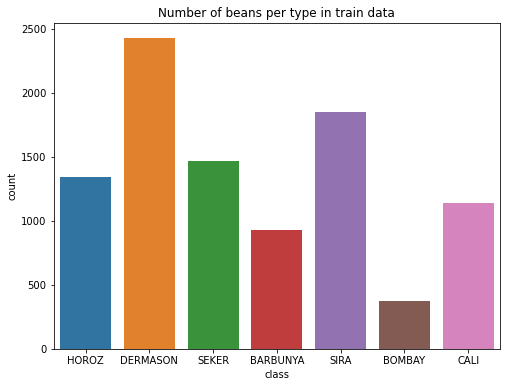

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x = train_data["class"])
plt.title("Number of beans per type in train data")
plt.show()

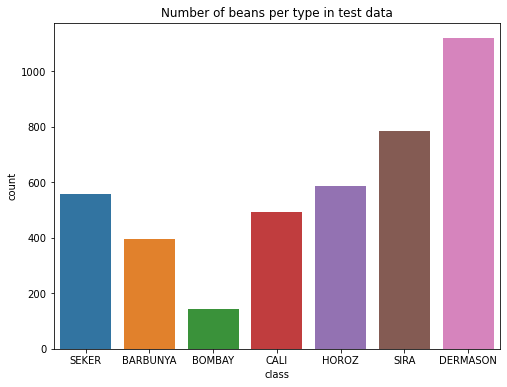

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x = test_data["class"])
plt.title("Number of beans per type in test data")
plt.show()

In [ ]:
"From the above we can conclude that there are 7 unique bean type of classes present in the data."

'From the above we can conclude that there are 7 unique bean type of classes present in the data.'

In [ ]:
# Checking for duplicate values present in the train_data
train_data.duplicated().sum()  

37

In [ ]:
# Checking for duplicate values present in the test_data
test_data.duplicated().sum()  

6

In [ ]:
"We have seen that there are 37 duplicates present in train_data and 6 duplicates present in test_data"

'We have seen that there are 37 duplicates present in train_data and 6 duplicates present in test_data'

In [ ]:
#Removing duplicates from the train and test data
train_data.drop_duplicates(keep=False,inplace=True)
test_data.drop_duplicates(keep=False,inplace=True)

In [ ]:
train_data.value_counts("class")

class
DERMASON    2427
SIRA        1850
SEKER       1468
HOROZ       1267
CALI        1137
BARBUNYA     928
BOMBAY       377
dtype: int64

In [ ]:
print("Skew values of all columns in a train data")
print("******************************************")
print(train_data.skew())
print("*******************************************")
median1 = test_data.quantile(0.50)
print("Skew values of all columns in a test data")
print("******************************************")
print(test_data.skew())

Skew values of all columns in a train data
******************************************
area                 2.932236
perimeter            1.642809
major_axis_length    1.389335
minor_axis_length    2.217412
aspect_ratio         0.589673
eccentricity        -1.059364
convex_area          2.923348
equiv_diameter       1.955380
extent              -0.933569
solidity            -2.591431
roundness           -0.651741
compactness          0.037774
shape_factor_1      -0.531641
shape_factor_2       0.289067
shape_factor_3       0.243788
shape_factor_4      -2.715409
dtype: float64
*******************************************
Skew values of all columns in a test data
******************************************
area                 2.973185
perimeter            1.589035
major_axis_length    1.311888
minor_axis_length    2.261744
aspect_ratio         0.588141
eccentricity        -1.081071
convex_area          2.956528
equiv_diameter       1.921385
extent              -0.800028
solidity            

In [ ]:
# Perform Replacing Outliers with Median Values in both train and test data

columns = ['area','perimeter','major_axis_length','minor_axis_length','convex_area','equiv_diameter']
median_ = train_data[columns].quantile(0.50)
high = train_data[columns].quantile(0.95)
train_data[columns] = np.where(train_data[columns] > high, median_, train_data[columns])

columns1 = ['area','perimeter','major_axis_length','minor_axis_length','convex_area','equiv_diameter']
median_t = test_data[columns].quantile(0.50)
high_t = test_data[columns].quantile(0.95)
test_data[columns] = np.where(test_data[columns] > high_t, median_t, test_data[columns])



In [ ]:
#Skew values of all columns in train and test data after handling outliers

print("Skew values of all columns in a train data after handling outliers")
print("******************************************")
print(train_data.skew())
print("*******************************************")
median1 = test_data.quantile(0.50)
print("Skew values of all columns in a test data after handling outliers")
print("******************************************")
print(test_data.skew())

Skew values of all columns in a train data after handling outliers
******************************************
area                 0.796537
perimeter            0.539005
major_axis_length    0.457934
minor_axis_length    0.505620
aspect_ratio         0.589673
eccentricity        -1.059364
convex_area          0.802469
equiv_diameter       0.519800
extent              -0.933569
solidity            -2.591431
roundness           -0.651741
compactness          0.037774
shape_factor_1      -0.531641
shape_factor_2       0.289067
shape_factor_3       0.243788
shape_factor_4      -2.715409
dtype: float64
*******************************************
Skew values of all columns in a test data after handling outliers
******************************************
area                 0.772426
perimeter            0.509725
major_axis_length    0.433513
minor_axis_length    0.500539
aspect_ratio         0.588141
eccentricity        -1.081071
convex_area          0.777906
equiv_diameter       0.495498
ex

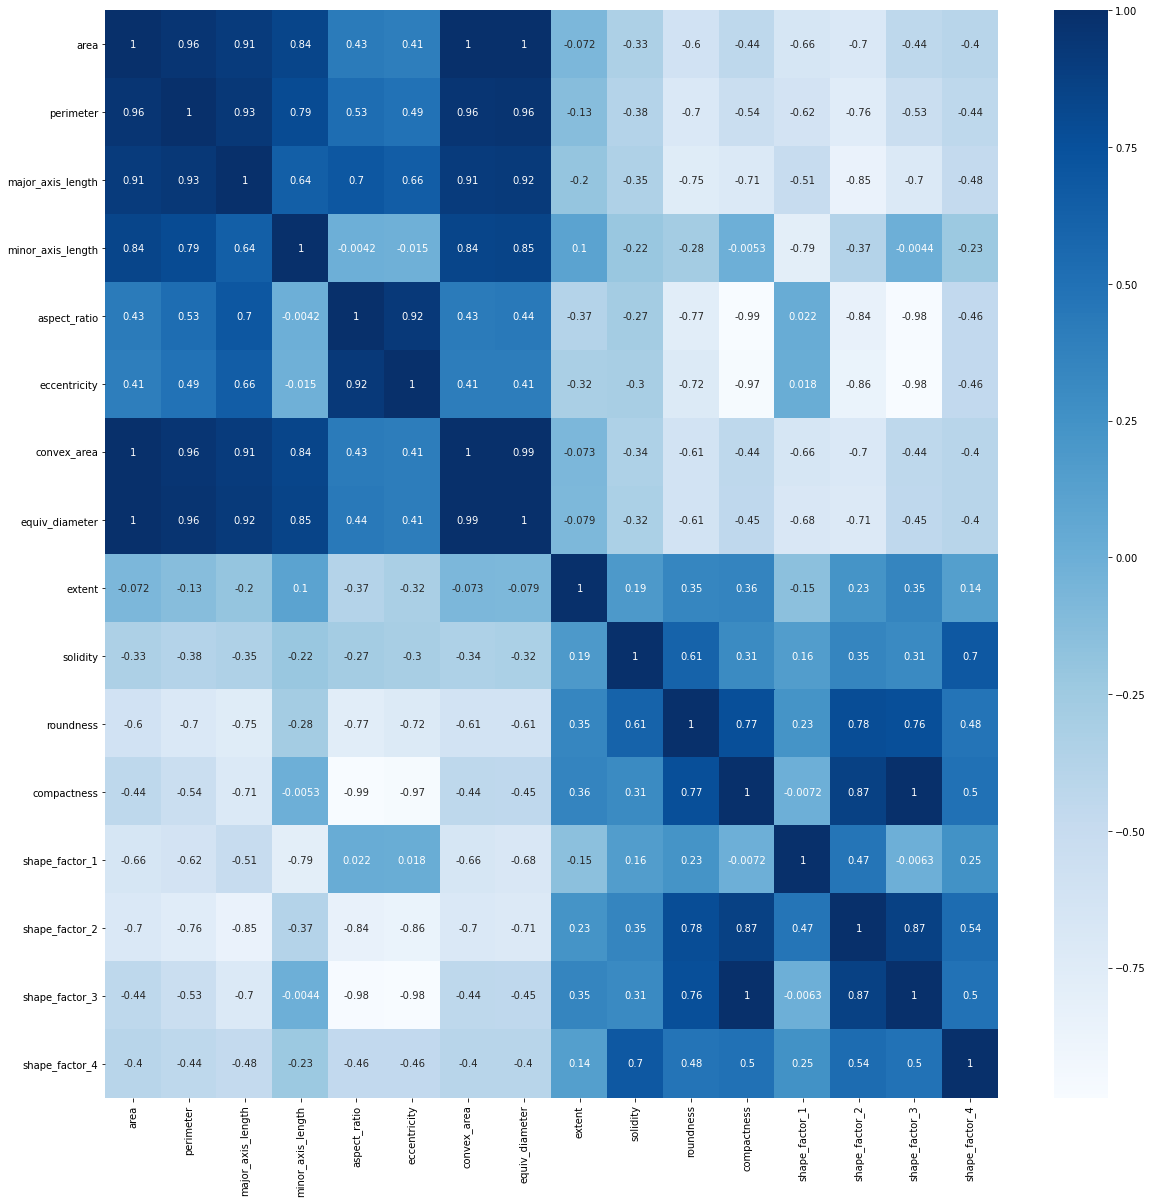

In [ ]:
# Display correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(train_data.corr(),cbar=True,annot = True, cmap = "Blues")
plt.show()


In [ ]:
"""From the above correlation matrix we can conclude that 
positive correlation occurs at: area,perimeter,major_axis_length,minor_axis_length,roundness,compactness,shape_factor_2,shape_factor_3

negative correlation occurs at:aspect_ratio, eccenticity,shape_factor_1,convex_area,equiv_diameter
"""

'From the above correlation matrix we can conclude that \npositive correlation occurs at: area,perimeter,major_axis_length,minor_axis_length,roundness,compactness,shape_factor_2,shape_factor_3\n\nnegative correlation occurs at:aspect_ratio, eccenticity,shape_factor_1,convex_area,equiv_diameter\n'

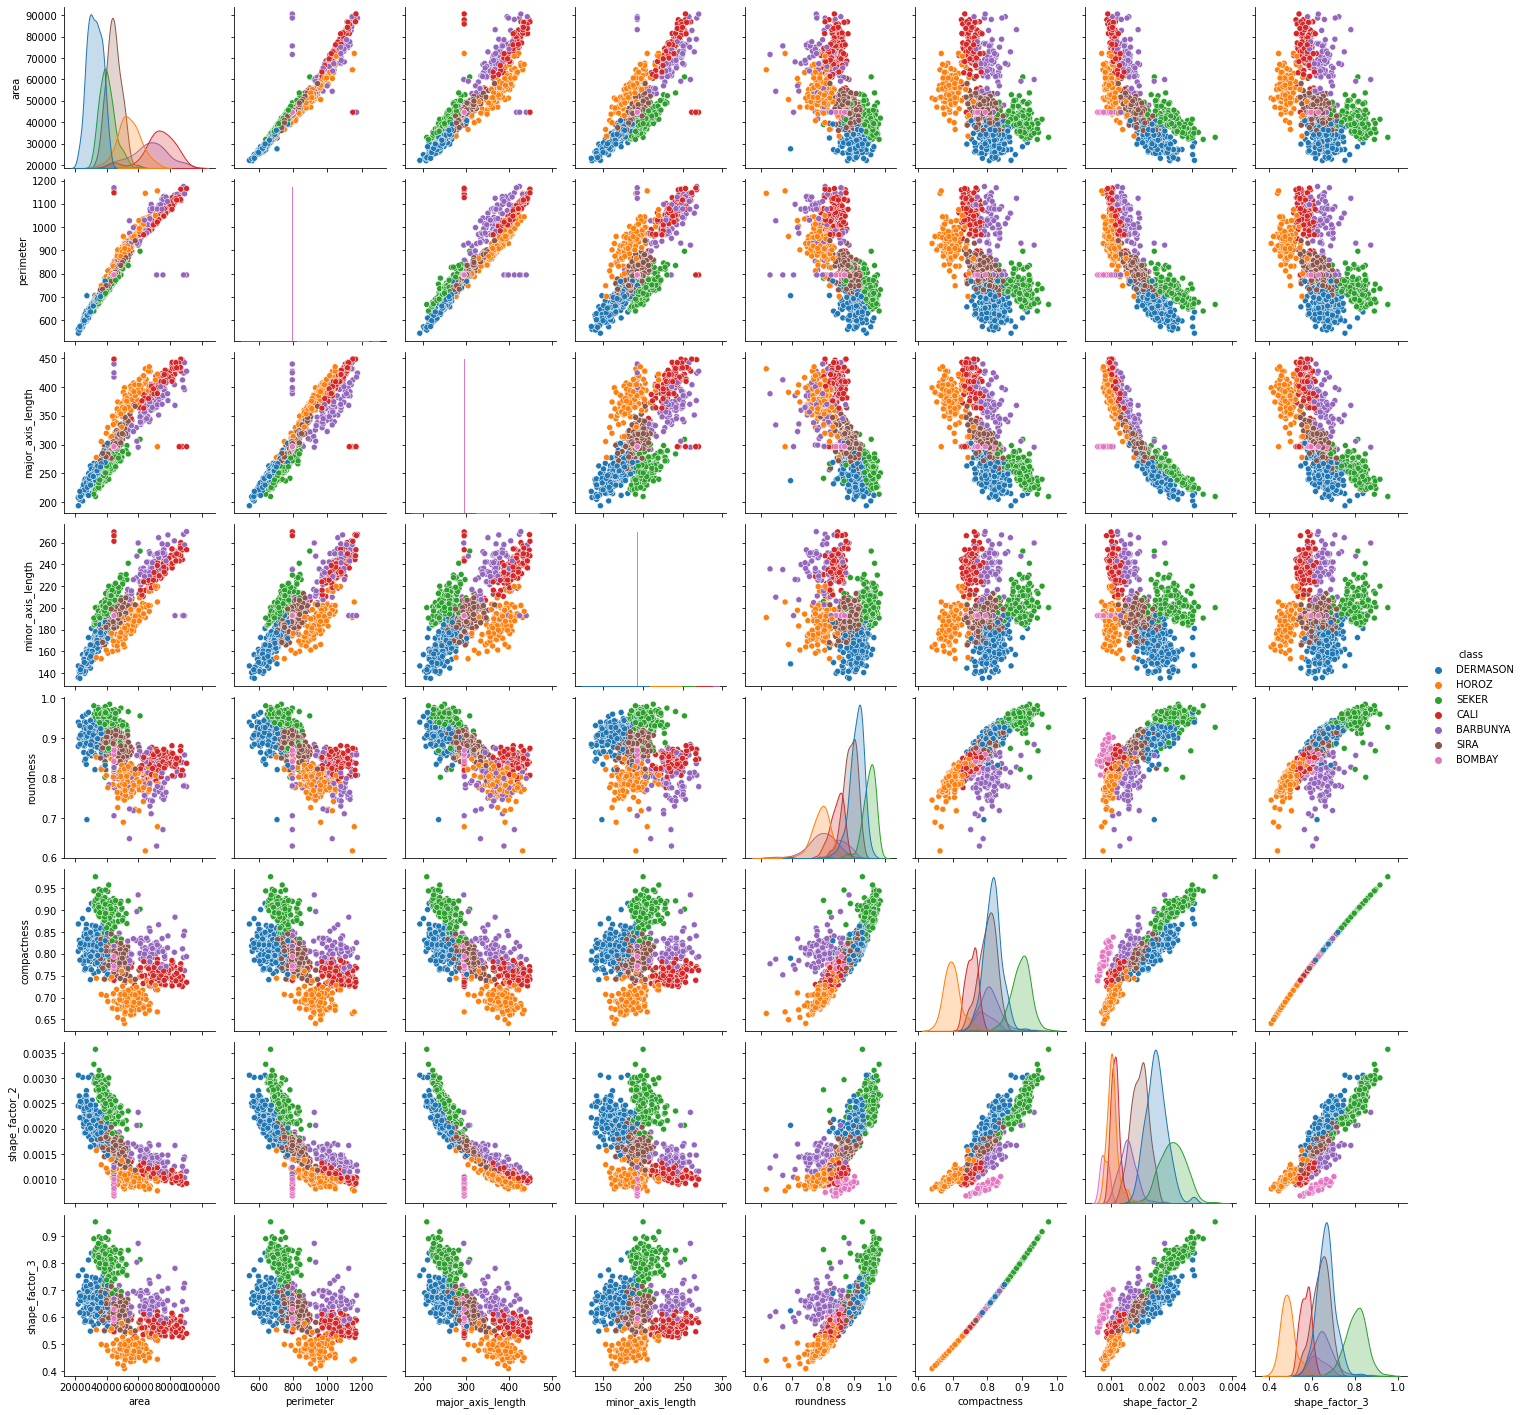

In [ ]:
# Data Visualization Techiniques  ex: Scatter plot, Box Plot,Pair plot,bar charts
sns.pairplot(train_data.sample(1000),vars = ["area","perimeter","major_axis_length","minor_axis_length","roundness","compactness","shape_factor_2","shape_factor_3"],hue="class")
plt.show()

In [ ]:
#Split columns in to dependent and independent variables

X_train = train_data.iloc[:, 0:16]  #independent columns
Y_train = train_data.iloc[:, -1]   #target column


In [ ]:
train_data.isnull().sum()   # Checking for null values present in the data

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor_1       0
shape_factor_2       0
shape_factor_3       0
shape_factor_4       0
class                0
dtype: int64

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_Best = SelectKBest(f_classif, k=6)
X_kbest = fvalue_Best.fit_transform(X_train, Y_train)

print('Original number of features:', X_train.shape)
print('Reduced number of features:', X_kbest.shape)

Original number of features: (9454, 16)
Reduced number of features: (9454, 6)


In [ ]:
cols = fvalue_Best.get_support(indices=True)


In [ ]:
features_df_new = X_train.iloc[:,cols]
print(features_df_new.columns)

Index(['perimeter', 'major_axis_length', 'aspect_ratio', 'equiv_diameter',
       'shape_factor_1', 'shape_factor_2'],
      dtype='object')


In [ ]:
X_test = test_data.iloc[:, 0:16]  #independent columns
Y_test = test_data.iloc[:, -1]   #target column

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, Y_train)   #Training the model.

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = classifier.predict(X_test)   #Predict test data set.

In [ ]:
#Checking performance our model with classification report.
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.93      0.93       394
      BOMBAY       0.91      1.00      0.95       145
        CALI       0.94      0.91      0.93       493
    DERMASON       0.91      0.94      0.92      1119
       HOROZ       0.97      0.95      0.96       575
       SEKER       0.95      0.94      0.94       559
        SIRA       0.87      0.85      0.86       786

    accuracy                           0.92      4071
   macro avg       0.93      0.93      0.93      4071
weighted avg       0.92      0.92      0.92      4071



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score


cm = confusion_matrix(Y_test, y_pred)
ac  = accuracy_score(Y_test,y_pred)

print(ac)
print(cm)

0.9209039548022598
[[ 366    0   17    0    0    2    9]
 [   0  145    0    0    0    0    0]
 [  20   14  450    0    3    0    6]
 [   0    0    0 1051    2   13   53]
 [   0    0   12    4  545    0   14]
 [   5    0    0   13    0  524   17]
 [   3    0    0   88   14   13  668]]


In [ ]:
# Model fitting with K-cross Validation and GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors':  list(range(1, 100)),
    'p': [1,2],
    'weights': ['uniform', 'distance']
}

clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

# fitting the model for grid search
clf.fit(X_train, Y_train)


print(clf.best_params_)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits
{'n_neighbors': 17, 'p': 2, 'weights': 'distance'}


In [ ]:
# Checking accuracy with test data

knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, Y_train)

Y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(Y_test,Y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.4f}%".format(test_accuracy))


Accuracy for our testing dataset with tuning is : 92.1395%


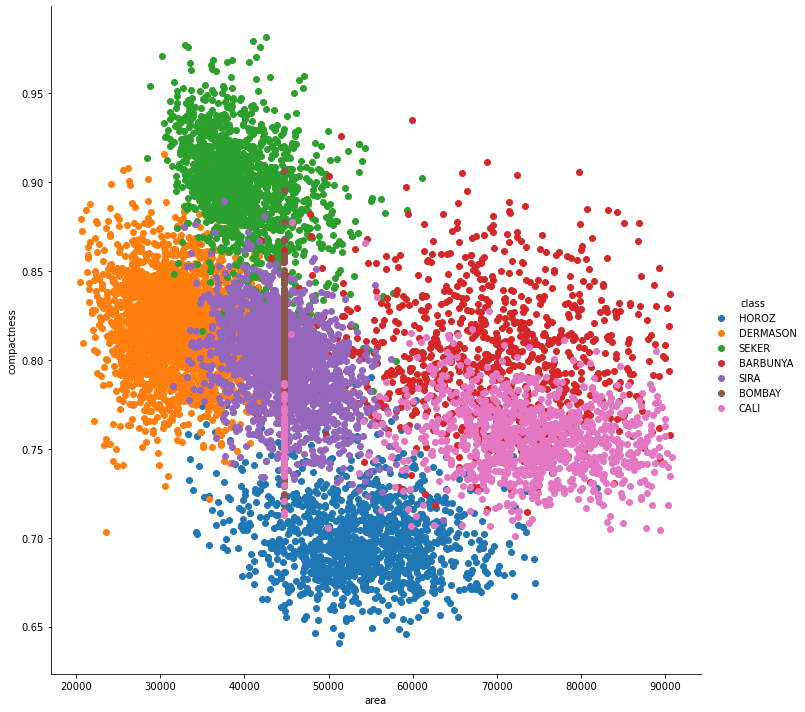

In [ ]:
sns.FacetGrid(train_data, hue="class", size=10) \
   .map(plt.scatter, "area", "compactness") \
   .add_legend()
plt.show()

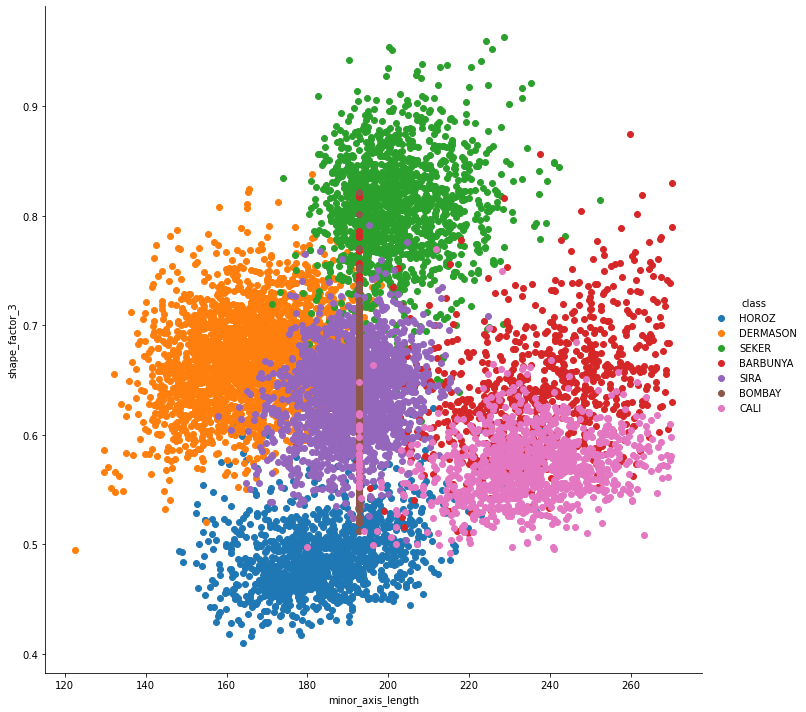

In [ ]:
sns.FacetGrid(train_data, hue="class", size=10) \
   .map(plt.scatter, "minor_axis_length", "shape_factor_3") \
   .add_legend()
plt.show()